In [1]:
import numpy as np
import matplotlib.pyplot as plt

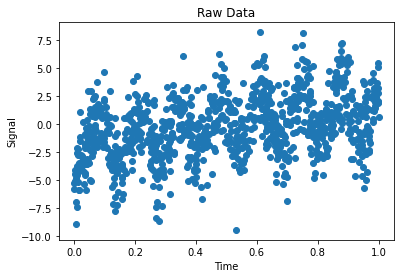

In [67]:
def is_float(string):
    try:
        return float(string)
    except ValueError:
        return False

data = []
with open('signal.dat', 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split('|')
        for i in k:
            if is_float(i):
                data.append(float(i)) 

data = np.array(data, dtype='float')
#This is the place I am not sure, I discussed with the others finding I divide the np.max terms here, then everything works fine now.
#Before adding this the fit doesn't going well, even invalid when I take the order higher than 5.
time = data[::2]/np.max(data[::2])
signal = data[1::2]

plt.scatter(time, signal)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Raw Data')
plt.savefig('2a.png')
plt.show()

In [70]:
A = np.zeros((len(time), 4))
for i in range(4):
    A[:,i]=time**i

(u, w, vt) = np.linalg.svd(A, full_matrices=False)
Ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
c = Ainv.dot(signal)
newA = A.dot(c)

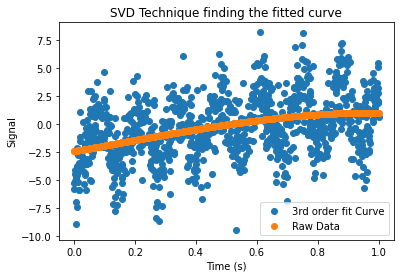

In [107]:
plt.scatter(time,signal,label = 'Raw Data')
plt.scatter(time,newA,label = '3rd order fit Curve' )
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend(['3rd order fit Curve', 'Raw Data'])
plt.title('SVD Technique finding the fitted curve')
plt.savefig('2b.png')
plt.show()

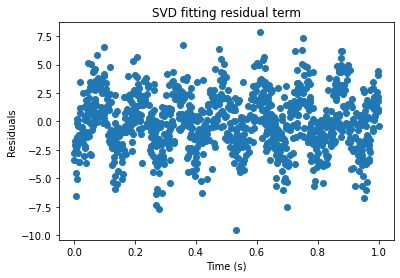

In [72]:
res = signal - newA
plt.scatter(time, res)
plt.xlabel('Time (s)')
plt.ylabel('Residuals')
plt.title('SVD fitting residual term')
plt.savefig('2c.png')
plt.show()

In [95]:
Ahigher = np.zeros((len(signal), 31))
for i in range(31):
    Ahigher[:,i]=time**i
(u, w, vt) = np.linalg.svd(Ahigher, full_matrices=False)
Ahigherinv = vt.transpose().dot(np.diag(1./w)).dot(u.transpose())
newc = Ahigherinv.dot(signal)
newAhigher = Ahigher.dot(newc)

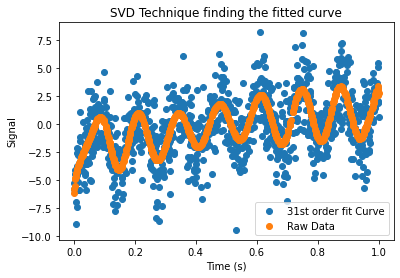

In [108]:
plt.scatter(time, signal,label = 'Raw Data')
plt.scatter(time, newAhigher,label = '31st order fit Curve' )
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend(['31st order fit Curve', 'Raw Data'])
plt.title('SVD Technique finding the fitted curve')
plt.savefig('2d.png')
plt.show()

Condition Number = 1.5666534125707712


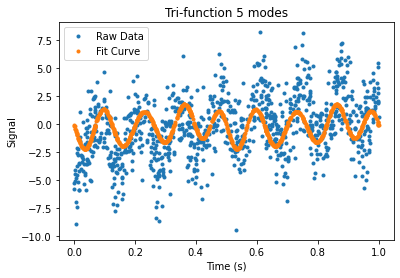

In [106]:
h = 5
omega = 2*np.pi/((np.max(x)-np.min(x))/2)
A3 = np.zeros((len(time), 2*h+1))
A3[:, 0] = 1.
A3[:, 1] = time
for i in np.arange(1,2*h,2):
    A3[:, i] = np.cos((omega*x)*((i+1)/2))
    A3[:, i+1] = np.sin((omega*x)*((i+1)/2))

(u, w, vt) = np.linalg.svd(A3, full_matrices=False)
print("Condition Number =",np.max(w)/np.min(w))
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
c = ainv.dot(signal)
newA3 = A3.dot(c) 


plt.plot(time, signal, '.', label='Raw Data')
plt.plot(time, newA3,'.', label='Fit Curve')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title('Tri-function 5 modes')
plt.savefig('2e.png')
plt.show()